In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
sns.set_theme(color_codes=True)

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Exploratory Data Analysis

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.shape

(1025, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
categorical_vars = ["sex", "cp", "fbs","restecg", "exang", "slope", "ca", "thal"]
numerical_vars = ["age", "trestbps", "chol", "thalach", "oldpeak"]

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# remove rows with wrong values for "ca" and "thal"
df.drop(df[df["ca"] == 4].index, inplace=True)
df.drop(df[df["thal"] == 0].index, inplace=True)

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,54.607000,0.691000,0.934000,131.592000,246.996000,0.146000,0.52400,148.977000,0.338000,1.092400,1.381000,0.701000,2.339000,0.508000
std,9.037822,0.462312,1.031847,17.714326,51.700802,0.353283,0.52887,23.083139,0.473265,1.180727,0.619857,0.944718,0.593659,0.500186
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.00000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.00000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.00000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,277.000000,0.000000,1.00000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.00000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


# Numerical features behaviour with target value

In [13]:
df[["target","age"]].groupby(["target"], as_index = False).mean().sort_values(by="target")

,target,age
0,0,56.689024
1,1,52.590551


In [14]:
df[["target","trestbps"]].groupby(["target"], as_index = False).mean().sort_values(by="target")

,target,trestbps
0,0,134.168699
1,1,129.096457


In [15]:
df[["target","thalach"]].groupby(["target"], as_index = False).mean().sort_values(by="target")

,target,thalach
0,0,138.969512
1,1,158.669291


In [16]:
df[["target","chol"]].groupby(["target"], as_index = False).mean().sort_values(by="target")

,target,chol
0,0,251.703252
1,1,242.437008


In [17]:
df[["target","oldpeak"]].groupby(["target"], as_index = False).mean().sort_values(by="target")

,target,oldpeak
0,0,1.614228
1,1,0.587008


Mean of the numerical variables are different correspoding with their target values. Therefor they can help the prediction process.

# Detecting Outliers

In [18]:
from collections import Counter
outlier_indices = []

for i in numerical_vars:
    Q1 = np.percentile(df[i],25)
    Q3 = np.percentile(df[i],75) 
    IQR = Q3 - Q1 
    
    outlier_step = IQR * 1.5 
    outlier_list_col = df[(df[i] < Q1 - outlier_step) | (df[i] > Q3 + outlier_step)].index 
    outlier_indices.extend(outlier_list_col) 

outlier_indices = Counter(outlier_indices)
multiple_outliers = list(k for k, v in outlier_indices.items() if v > 2) 
    
print(multiple_outliers)

[]


# Data Visualization

# Target Value Visualization

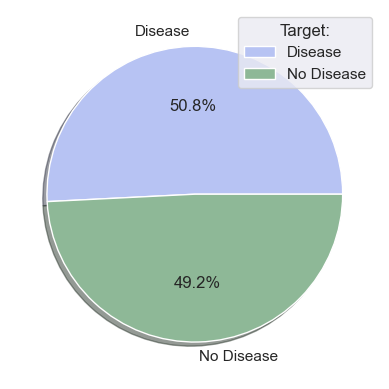

In [19]:
plt.pie(df["target"].value_counts(), labels = ["Disease", "No Disease"], shadow = True, autopct = "%1.1f%%", colors = ["#B7C3F3",  "#8EB897"])
plt.legend(title = "Target:")
plt.show()

Dataset is balanced when compared with the target value

# Categorical Variables Visualization

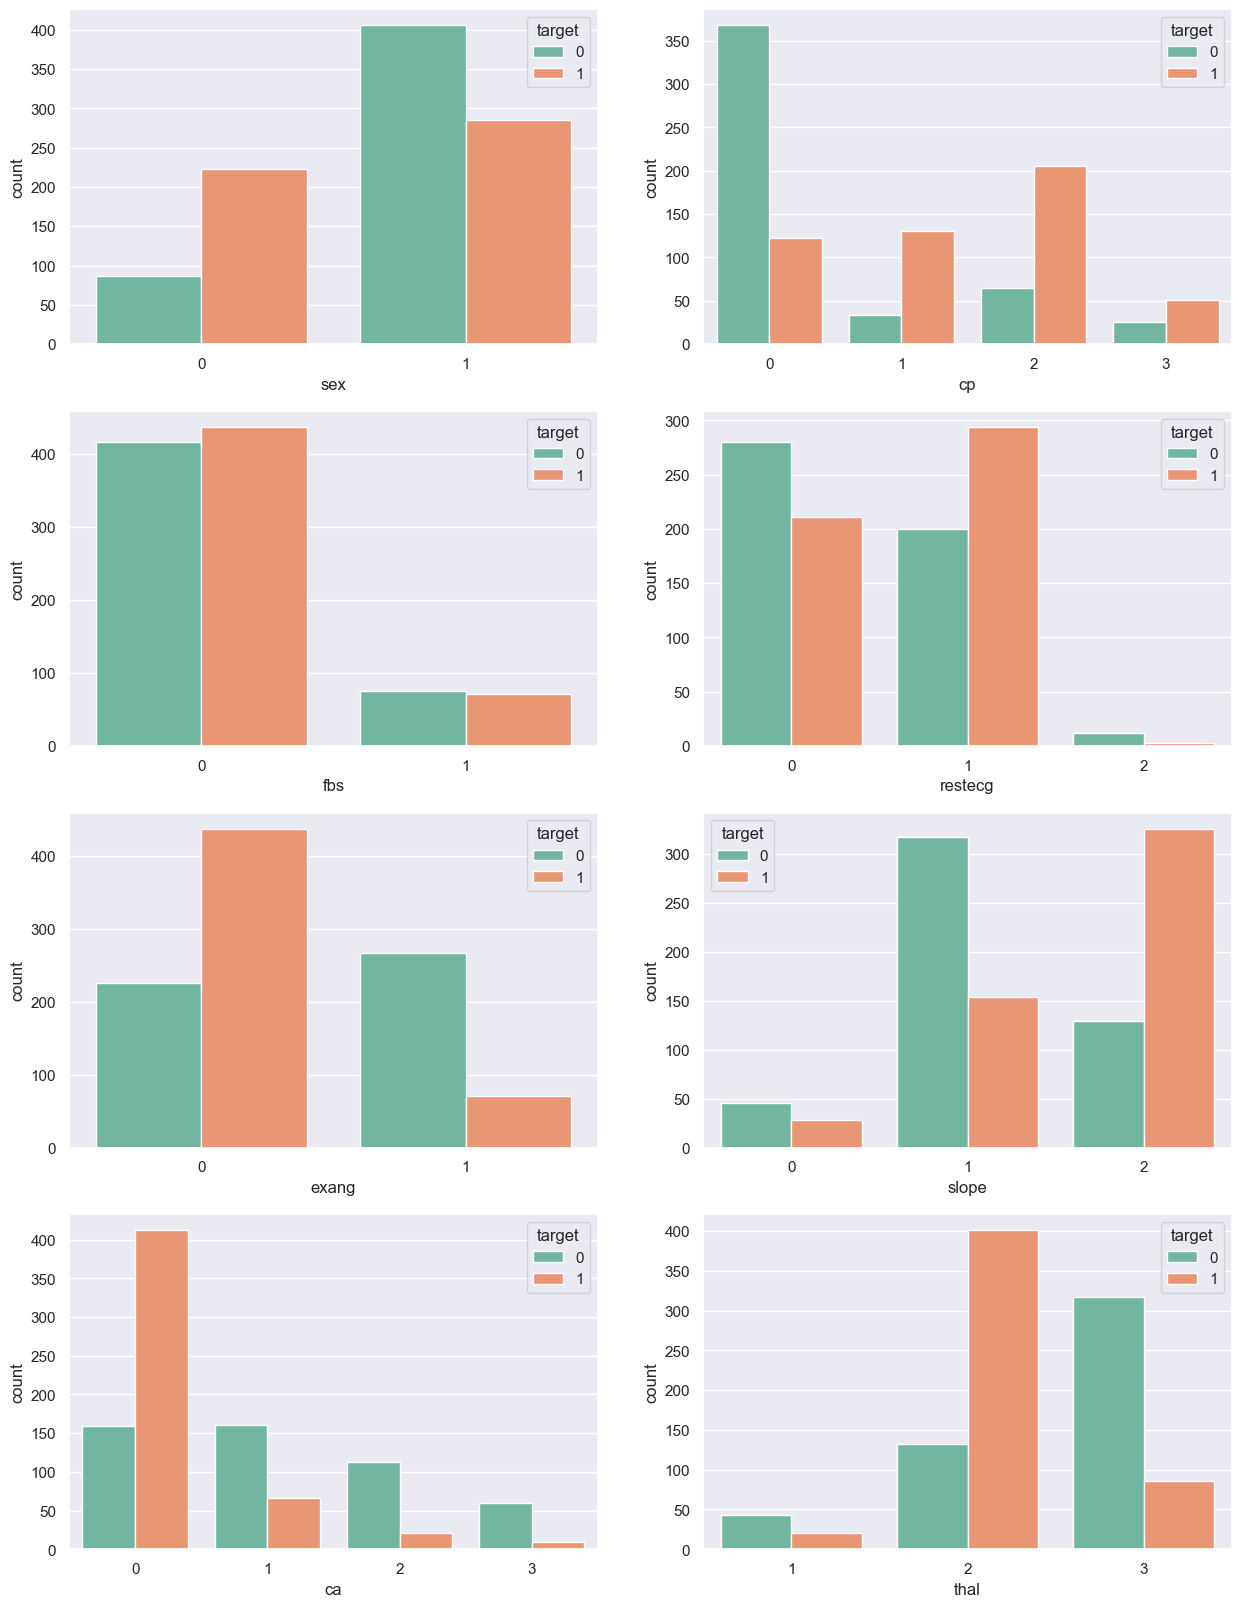

In [20]:
i = 0
plt.figure(figsize=(15,20))

for categorical_feature in categorical_vars:
    i += 1
    plt.subplot(4, 2, i)
    sns.countplot(x = df[categorical_feature], data = df, hue = "target", palette = "Set2")

plt.show()

Women have a higher risk of heart disease than men. If cp -> typical angina the heart disease risk is very low. fbs may not be a distinctive feature for us. restecg -> 1 has a higher rate of heart disease than restecg -> 0 (There are few samples for restecg -> 2). exang -> 0 has a higher rate of heart disease than exang -> 1. slope -> 2 has a higher rate of heart disease than slope -> 1. ca -> 0, ca -> 1,2,3 It may be important to us because of the difference between. thal -> 2 has a higher rate of heart disease than thal -> 3.

# Numerical Variables Visualization

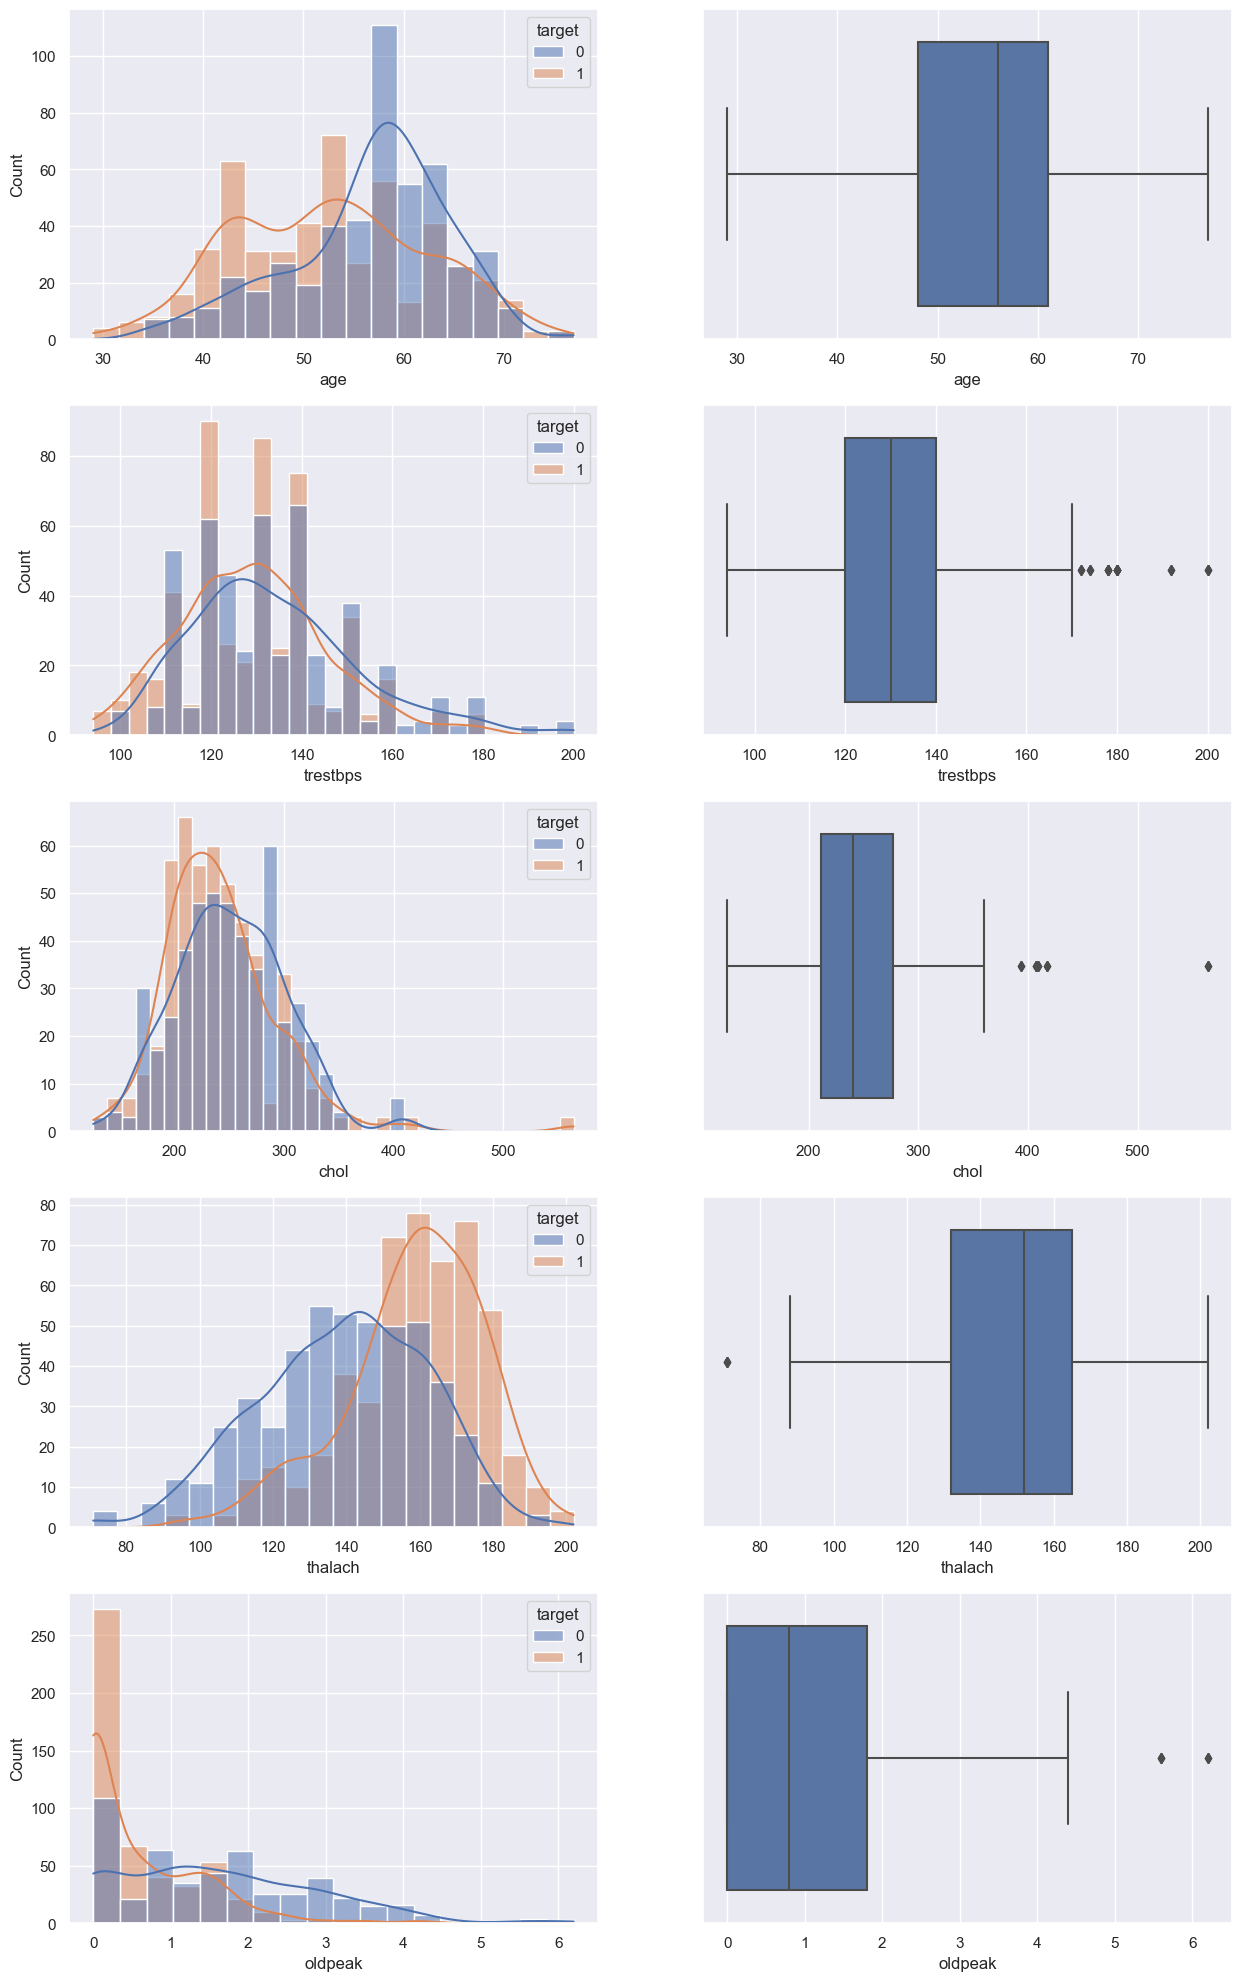

In [21]:
i = 0
plt.figure(figsize=(15,30))

for numerical_feature in numerical_vars:

    i += 1
    plt.subplot(6, 2, i)
    sns.histplot(x = df[numerical_feature], data = df, kde = True, hue = "target")

    i += 1
    plt.subplot(6, 2, i)
    sns.boxplot(x = df[numerical_feature], data = df)
    
plt.show()

Data for oldpeak was found to be imbalanced. Some outliers were observed but we have already examined this situation in outlier detection.

# Correlation Matrix

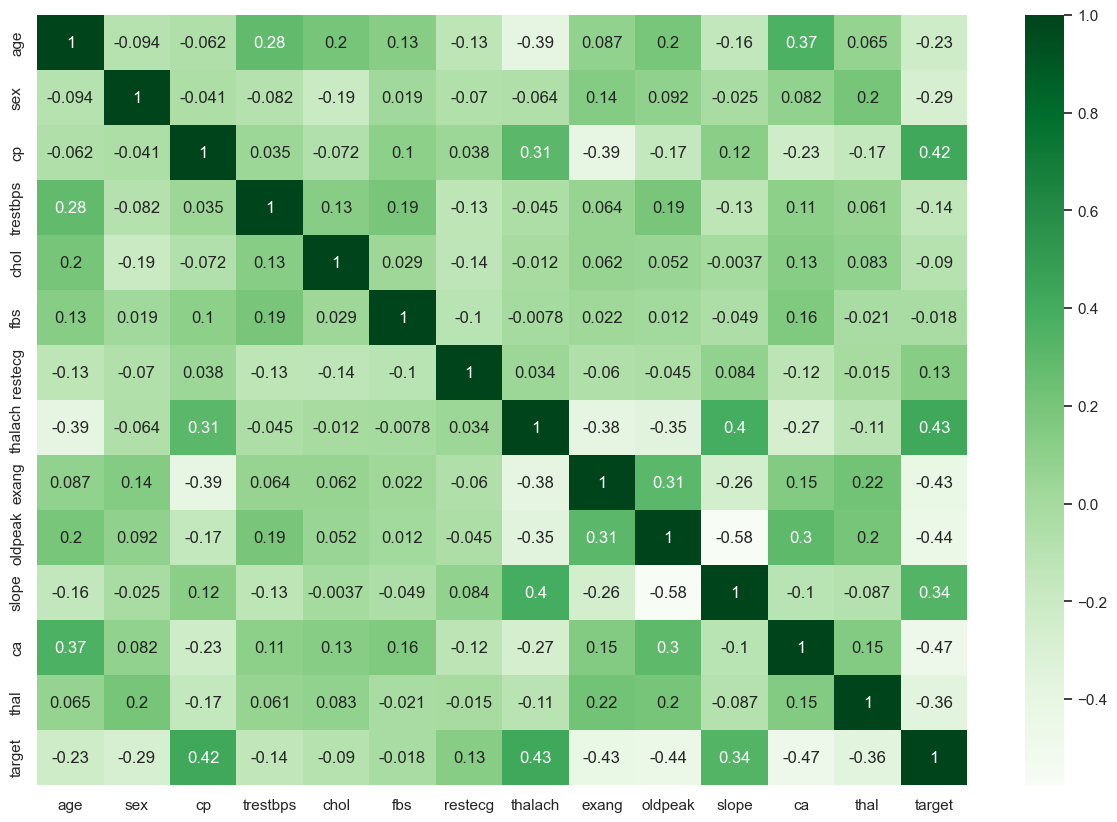

In [22]:
corr = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="Greens")

plt.show()

# Data Preprocessing

In [23]:
df.head()

# Categorical features preprocessing
df = pd.get_dummies(df, columns = categorical_vars)

# Numerical feature scaling
scaler = StandardScaler()
df[numerical_vars] = scaler.fit_transform(df[numerical_vars])

# Modeling

# Splitting the Data

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

In [25]:
# Create variables for feature data and target values

X = df.drop(["target"], axis=1) # feature data
y = df["target"].values # target values

In [26]:
# Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 128) # %70 train data, %30 test data

# Print lengths of training and testing datasets for each feature and target variable

print("X_train: ",len(X_train))
print("X_test: ",len(X_test))
print("y_train: ",len(y_train))
print("y_test: ",len(y_test))

X_train:  700
X_test:  300
y_train:  700
y_test:  300


In [27]:
# Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 128) # %70 train data, %30 test data

# Print lengths of training and testing datasets for each feature and target variable

print("X_train: ",len(X_train))
print("X_test: ",len(X_test))
print("y_train: ",len(y_train))
print("y_test: ",len(y_test))

X_train:  700
X_test:  300
y_train:  700
y_test:  300


# Model Training and Parameter Tuning

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
# Set the random seed
random_state = 128 

# Define the machine learning model
model = DecisionTreeClassifier(random_state = random_state)
         
         
# Define the class name
model_name = "DecisionTreeClassifier"

# Define the hyperparameter grid for the model
dt_params = {"min_samples_split" : range(10,50,20),
             "max_depth": range(1,10,2)} 

# Define the hyperparameter grid
param_grids = dt_params

In [30]:
from sklearn.metrics import f1_score, accuracy_score, plot_confusion_matrix, plot_roc_curve, classification_report

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Machine Learning Models: DecisionTreeClassifier
Cross Validation Scores: [0.9042857142857142]
Best Parameters: [DecisionTreeClassifier(max_depth=9, min_samples_split=10, random_state=128)]

-----------------------------------------------------

Train Accuracy of Classifier:  0.9771428571428571
Test Accuracy of Classifier:  0.9566666666666667
The F1 Score of Classifier:  0.9534050179211468

-----------------------------------------------------

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       159
           1       0.96      0.94      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300


-----------------------------------------------------

ROC Curve: 



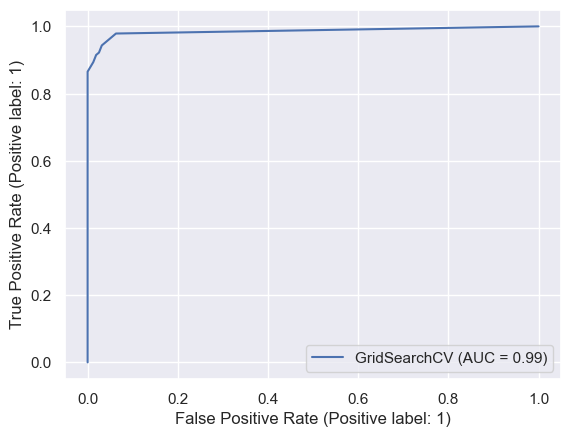


-----------------------------------------------------

Confusion Matrix: 



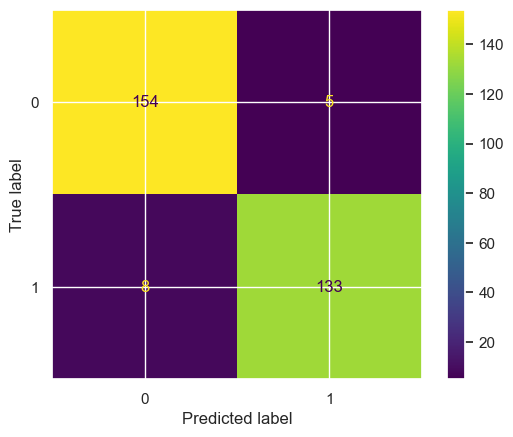


****************************************************************

DecisionTreeClassifier Model Accuracy is 95.67%


In [31]:
# Define two list to store the results and estimators
cv_result = []
best_estimators = []

# Define the stratified K-fold cross-validation scheme
cv = StratifiedKFold(n_splits = 5)

# Define the grid search strategy
clf = GridSearchCV(model, 
                   param_grid=param_grids, 
                   cv = cv, 
                   scoring = "accuracy", 
                   n_jobs = -1,
                   verbose = 1)
    
# Print the cross validation score, best parameters and the train and test accuracy of the model
clf.fit(X_train,y_train)
cv_result.append(clf.best_score_)
best_estimators.append(clf.best_estimator_)

print("Machine Learning Models:", model_name)
print("Cross Validation Scores:", cv_result)
print("Best Parameters:", best_estimators)
print("\n-----------------------------------------------------\n")

print("Train Accuracy of Classifier: ", accuracy_score(clf.predict(X_train),y_train))
print("Test Accuracy of Classifier: ", accuracy_score(clf.predict(X_test),y_test))
print("The F1 Score of Classifier: ", f1_score(clf.predict(X_test), y_test))
print("\n-----------------------------------------------------\n")

# Print the classification report and plot the ROC curve and confusion matrix
print("Classification Report: \n", classification_report(y_test, clf.predict(X_test)))
print("\n-----------------------------------------------------\n")

print("ROC Curve: \n")
plot_roc_curve(clf, X_test, y_test)
plt.show()
print("\n-----------------------------------------------------\n")

print("Confusion Matrix: \n")
plot_confusion_matrix(clf, X_test, y_test)
plt.show()
print("\n****************************************************************\n")

a = accuracy_score(clf.predict(X_test),y_test)   
print(model_name,f'Model Accuracy is {a*100:.2f}%')
# print(model_name,"Model Accuracy is {}%".format(a*100.2f))

# Model Evaluation

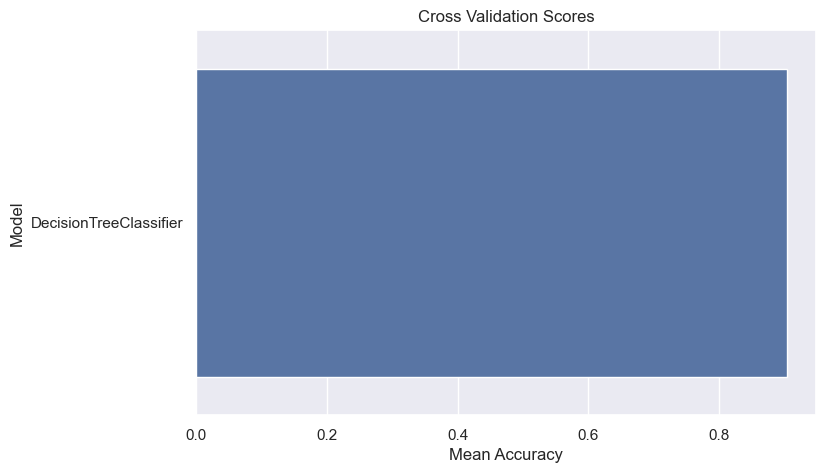

In [32]:
# Create dataframe with mean accuracy score of the model
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, 
                           "Model":["DecisionTreeClassifier",
                                   ]}).sort_values(by="Cross Validation Means")

# Create barplot to visualize mean accuracy score of the model
plt.figure(figsize=(8,5))
g = sns.barplot("Cross Validation Means", "Model", data = cv_results)

# Set x-axis label and plot title
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

# Display plot
plt.show()
